Now we want to reduce the dimensionality of the proteomic data.
First, we retrieve the stored data.

In [1]:
%store -r normal_patients
%store -r normal_prot
%store -r all_patients
%store -r all_prot

In [2]:
import numpy as np
import pandas as pd
%conda install scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

3 channel Terms of Service accepted
Retrieving notices: done
Channels:
 - defaults
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: c:\Users\jason\miniconda3\envs\cs312

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.12.2  |       haa95532_0         125 KB
    icc_rt-2022.1.0            |       h6049295_2         6.5 MB
    joblib-1.5.2               |  py312haa95532_0         517 KB
    scikit-learn-1.7.2         |  py312h7f7e138_1         8.5 MB
    scipy-1.16.3               |  py312hbd6d557_0        27.7 MB
    threadpoolctl-3.5.0        |  py312h4442805_1          48 KB
    ------------------------------------------------------------
                                           Total:        43.3 MB

The following NEW packages will be INSTALLED:

  icc_rt             pkgs/main/wi

In [3]:
print(all_prot.max().max())
print(all_prot.min().min())

7.796314684465253
-7.985884888123239


We want our data to be normalized for PCA. The data is pretty widely spread. However, negative values mean it's not just raw expression data. It's likely been transformed already.
Let's do some more math to see what we're looking at.

In [4]:
prot_dist_stats = all_prot.describe().T[['mean','std']]
print(prot_dist_stats['mean'].min())
print(prot_dist_stats['mean'].max())
print(prot_dist_stats['std'].min())
print(prot_dist_stats['std'].max())

-4.533969510866671
2.0996212270047736
0.11167970676536301
2.98387673374958


This indicates the data has probably been centered, but not normalized.
Let's scale each protein to be normalized.

In [5]:
scaler = StandardScaler()
prot_scaled = pd.DataFrame(
    scaler.fit_transform(all_prot), 
    index=all_prot.index, 
    columns=all_prot.columns
)
prot_scaled

c:\Users\jason\miniconda3\envs\cs312\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\jason\miniconda3\envs\cs312\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\jason\miniconda3\envs\cs312\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Name,ARF5,M6PR,ESRRA,FKBP4,NDUFAF7,FUCA2,DBNDD1,SEMA3F,CFTR,CYP51A1,...,DDHD1,WIZ,GBF1,APOA5,WIZ,LDB1,WIZ,RFX7,SWSAP1,SVIL
Database_ID,ENSP00000000233.5,ENSP00000000412.3,ENSP00000000442.6,ENSP00000001008.4,ENSP00000002125.4,ENSP00000002165.5,ENSP00000002501.6,ENSP00000002829.3,ENSP00000003084.6,ENSP00000003100.8,...,ENSP00000500986.2,ENSP00000500993.1,ENSP00000501064.1,ENSP00000501141.1,ENSP00000501256.3,ENSP00000501277.1,ENSP00000501300.1,ENSP00000501317.1,ENSP00000501355.1,ENSP00000501521.1
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01BR001,0.188284,-1.814247,NaN,-0.666932,2.888948,-0.752438,1.420498,-0.411501,NaN,-0.142503,...,-1.362787,-1.327957,-0.919117,NaN,NaN,-1.654606,-0.290793,-0.334686,-1.038080,NaN
01BR008,-1.236712,1.437186,0.421297,-0.807571,1.120189,-1.032339,-2.042332,-0.577602,-0.340193,0.234808,...,1.540711,NaN,0.105539,NaN,NaN,-0.120659,0.708855,0.682004,-1.617735,NaN
01BR009,-0.415389,0.173460,0.755232,-0.506623,3.217055,-0.938549,-0.303962,0.235078,-0.705326,0.693133,...,1.129658,NaN,-1.372489,NaN,NaN,-0.596078,0.362824,0.782083,-0.702105,NaN
01BR010,0.440114,1.180979,-0.808225,-1.287785,0.434174,-0.727899,-0.139721,0.271867,NaN,1.195923,...,-0.851456,NaN,1.400585,NaN,NaN,-1.133106,-0.394588,0.387457,-1.874066,0.613515
01BR015,-1.222947,-1.648399,NaN,-0.008252,-0.588847,-0.557360,0.563014,0.146210,NaN,-0.796452,...,1.028137,-1.143365,-0.785598,NaN,NaN,0.109407,3.209620,-0.169682,-0.181832,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21BR010,1.584004,0.074477,-1.196397,-0.075532,-0.002527,1.122262,0.367695,0.458972,0.869647,-0.059968,...,-0.281975,1.255194,1.031448,NaN,-0.636325,-0.125450,-0.805658,-0.308279,-1.002666,0.542512
22BR005,-1.331816,0.679751,NaN,1.247367,-0.449744,0.138453,-0.158708,0.530704,NaN,-0.263727,...,1.902622,NaN,0.653675,NaN,NaN,0.110199,-0.736742,0.252909,NaN,0.390202


In [6]:
scaled_dist_stats = prot_scaled.describe().T[['mean','std']]
scaled_dist_stats


,,mean,std
Name,Database_ID,,
ARF5,ENSP00000000233.5,-5.460113e-18,1.004124
M6PR,ENSP00000000412.3,-1.072116e-17,1.004124
ESRRA,ENSP00000000442.6,-3.249433e-17,1.006154
FKBP4,ENSP00000001008.4,0.000000e+00,1.004124
NDUFAF7,ENSP00000002125.4,-7.280151e-18,1.004124
...,...,...,...
LDB1,ENSP00000501277.1,-1.192978e-17,1.004124
WIZ,ENSP00000501300.1,-2.411550e-17,1.004124
RFX7,ENSP00000501317.1,-1.071268e-17,1.004415


We'll have to reselect the proteomics data for just the patients of interest rather than separately normalizing them. But let's cross that bridge when we come to it.
We'll also need to remove Na values.

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
prot_prepped = imputer.fit_transform(prot_scaled)

c:\Users\jason\miniconda3\envs\cs312\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: [  676  1320  1479  1698  1727  2692  2710  4034  4100  4113  4888  5598
  5878  6752  7409  7516  7861  8148  8654  8690  9092  9172  9221  9251
  9461  9953  9993 10019 10287 10414 10436 10624 11136 11167 11187 11536
 11920 11923 12122 12157]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [8]:
pca = PCA(n_components=2)

x_pca = pca.fit_transform(prot_prepped)
print("Original shape: ", prot_prepped.shape)
print("Reduced shape: ", x_pca.shape)
print("Explained variance ratio: ", sum(pca.explained_variance_ratio_))


Original shape:  (122, 12882)
Reduced shape:  (122, 2)
Explained variance ratio:  0.17665210085760746


In [9]:
%conda install matplotlib
import matplotlib.pyplot as plt


3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: c:\Users\jason\miniconda3\envs\cs312

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    matplotlib-3.10.6          |  py312haa95532_1           7 KB
    ------------------------------------------------------------
                                           Total:           7 KB

The following packages will be UPDATED:

  matplotlib                         3.10.6-py312haa95532_0 --> 3.10.6-py312haa95532_1 



matplotlib-3.10.6    | 7 KB      |            |   0% 
matplotlib-3.10.6    | 7 KB      | ########## | 100% 
matplotlib-3.10.6    | 7 KB      | ########## | 100% 
matplotlib-3.10.6    | 7 KB      | ########## | 100% 
                                                     
 done
Preparing transaction: d

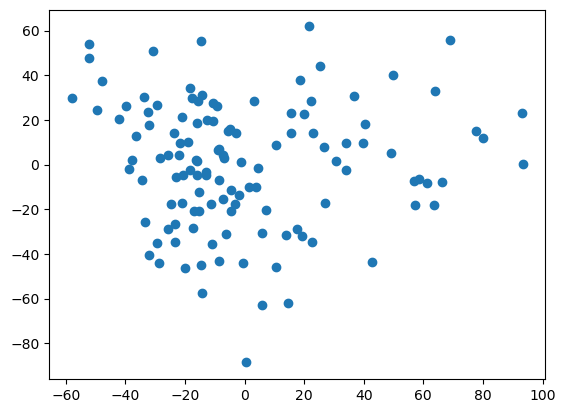

In [10]:
plt.plot(x_pca[:,0], x_pca[:,1], 'o')
plt.show()

In [11]:
x_pca

array([[ 18.66447044,  37.83427841],
       [ 56.93943074,  -7.47657906],
       [ 15.43002497,  14.26867481],
       [-13.01523121,  -4.80234273],
       [ -4.7844797 ,  16.16564169],
       [ 22.39957609,  28.53082195],
       [ 40.424328  ,  17.97996102],
       [ 57.23366431, -18.11501753],
       [  0.37171404, -88.64127355],
       [  7.28430447, -20.372493  ],
       [  3.16086825,  28.33862724],
       [ 77.64618643,  14.9874806 ],
       [ -3.0333769 ,  14.29221457],
       [ 34.14189661,   9.79501034],
       [-14.22865909, -57.59799629],
       [-20.93894746,  21.2449669 ],
       [ 69.05313166,  55.72771869],
       [ 63.88220499,  32.81580502],
       [ 49.79216559,  40.31814827],
       [-25.84834401,   4.16213351],
       [-23.10823746,  -5.37628525],
       [-52.32498216,  54.10587433],
       [ 63.43201003, -17.9324168 ],
       [-29.38444865, -34.99235842],
       [-17.30977596, -28.3550311 ],
       [-42.12548111,  20.33182971],
       [ 19.88476311,  22.81538575],
 

In [12]:
prot_pca = pd.DataFrame(
    x_pca, 
    index=all_prot.index, 
    columns=['PC1', 'PC2']
)
prot_pca

,PC1,PC2
Patient_ID,,
01BR001,18.664470,37.834278
01BR008,56.939431,-7.476579
01BR009,15.430025,14.268675
01BR010,-13.015231,-4.802343
01BR015,-4.784480,16.165642
...,...,...
21BR010,-34.379564,-6.725671
22BR005,1.640498,-10.220039
22BR006,-24.854487,-17.756289


In [13]:
pca_of_interest = prot_pca.loc[normal_patients]
pca_of_interest

,PC1,PC2
Patient_ID,,
01BR023,0.371714,-88.641274
01BR025,7.284304,-20.372493
03BR002,-25.848344,4.162134
03BR005,-52.324982,54.105874
05BR001,19.884763,22.815386
05BR003,-18.848305,10.158442
11BR015,5.952172,-62.815737
11BR027,-32.026850,-40.327118
11BR049,-4.500973,-11.423898


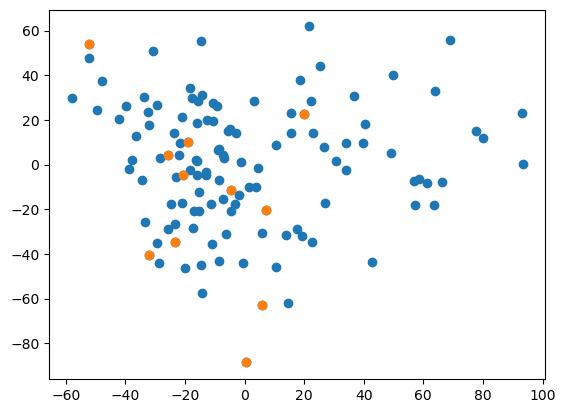

In [14]:
plt.plot(prot_pca['PC1'], prot_pca['PC2'], 'o')
plt.plot(pca_of_interest['PC1'], pca_of_interest['PC2'], 'o')
plt.show()

There it is! Our patients without driver mutations or significant copy number variations are in orange, while the other patients are in blue. Looking at this, they don't seem to be clustering differently than the other patients. However, we have to remember that this only shows two principal components that explain only about ~18% of the variance. Let's use an actual metric to see if they're measurably different or not.

In [15]:
pca_big = PCA(n_components=0.80)

x_pca_big = pca_big.fit_transform(prot_prepped)
print("Original shape: ", prot_prepped.shape)
print("Reduced shape: ", x_pca_big.shape)
print("Explained variance ratio: ", sum(pca_big.explained_variance_ratio_))

Original shape:  (122, 12882)
Reduced shape:  (122, 56)
Explained variance ratio:  0.8012253608337601


In [16]:
prot_pca_big = pd.DataFrame(
    x_pca_big, 
    index=all_prot.index, 
    columns=[f'PC{i+1}' for i in range(x_pca_big.shape[1])]
)
prot_pca_big

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01BR001,18.664470,37.834304,-22.002390,-4.000175,1.383124,-28.010365,25.296863,16.589772,-12.275858,1.668591,...,19.682059,6.033110,17.473019,2.061120,-6.368664,2.883361,17.211640,-6.636438,-1.270433,13.716338
01BR008,56.939428,-7.476578,37.911240,-14.279853,-10.845493,29.741104,14.672611,9.407763,28.198879,-3.412375,...,-0.121598,4.492079,-6.617804,4.954146,1.415676,-3.872976,4.028963,-6.092812,-2.047978,2.652008
01BR009,15.430019,14.268691,22.433162,-15.106306,0.985129,-26.502354,35.239801,16.371766,9.829559,7.648004,...,-12.120776,2.997410,8.446618,4.623991,9.258409,-22.282783,-2.433408,-1.657806,-4.600258,-15.299376
01BR010,-13.015234,-4.802354,38.010860,25.371997,25.096857,-30.288497,21.195547,23.003506,23.518332,-6.198892,...,8.734407,1.580830,-7.690022,-3.281728,-2.923612,0.551130,6.960156,-2.510858,7.272484,6.592647
01BR015,-4.784475,16.165631,-21.846652,-17.299349,28.880760,-7.236303,-5.795147,9.814044,10.593645,-16.655148,...,7.653116,-5.498044,7.538824,-7.736555,-1.297800,-0.101617,-2.205660,-7.009236,-2.660789,2.490820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21BR010,-34.379566,-6.725663,-11.425015,5.572647,9.431136,3.463847,-12.559075,-9.515858,3.576053,2.854779,...,8.668003,2.578895,6.819437,-6.582937,-9.369883,-7.052636,4.684262,0.074119,-8.052836,1.908434
22BR005,1.640500,-10.220018,2.251381,5.959224,6.309769,7.638904,-0.319947,0.773120,-6.723185,-2.033552,...,8.071766,-3.517882,5.427792,1.064409,4.649297,-0.372357,3.240487,7.133763,2.338630,-4.459257
22BR006,-24.854488,-17.756272,17.165346,9.163895,3.483937,3.036527,-0.767983,-13.861299,2.675734,6.576622,...,-6.905718,-3.233214,5.498115,-2.218905,-3.099217,4.733029,8.683617,6.589792,14.976237,-1.582744


In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram

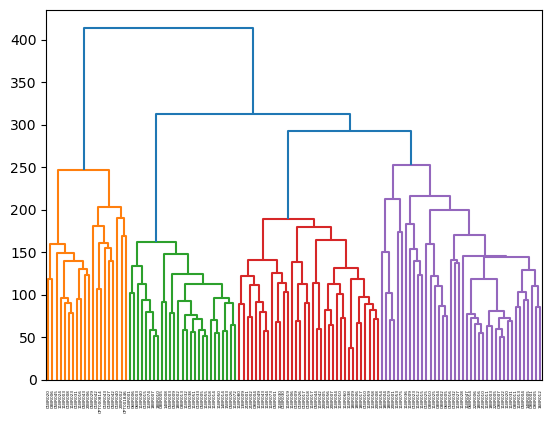

In [18]:
prot_linkage = linkage(prot_pca_big, method='ward', metric='euclidean')
dendro = dendrogram(prot_linkage, labels=prot_pca_big.index, leaf_font_size=3)

Wow! Look at that! Now we can see which samples are most related to each other. Let's try to highlight our samples and then see if they lie on the same branches.

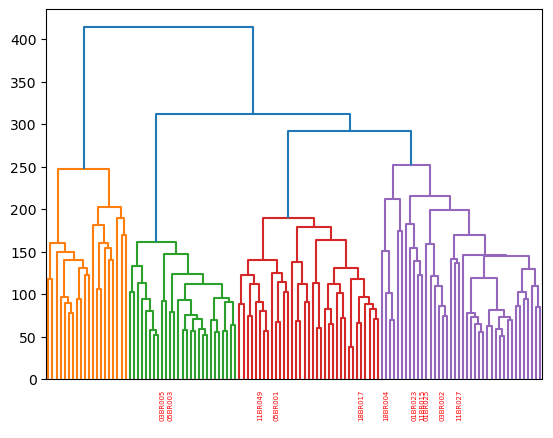

In [19]:
dendro = dendrogram(prot_linkage, labels=prot_pca_big.index, leaf_font_size=5)
ax = plt.gca()
for lbl in ax.get_xmajorticklabels():
    if lbl.get_text() in set(normal_patients):
        lbl.set_color('red')
        lbl.set_rotation(90)
    else:
        lbl.set_alpha(0)


Now, our patients of interest are in red on the bottom.
Looking at this graph, not much is apparent. In 56 dimensions of principal components, our patients are not that close.
It would have been interesting if they did group on their own, but it's not surprising. This may indicate a few things. 
Most of these mystery patients, while not having driver mutations, are similar to patients who do have driver mutations. Perhaps they have other mutations that affect the same pathway.